In [178]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix

In [88]:
pd.set_option('display.max_columns', 500)

In [89]:
df = pd.read_csv('data/movies.csv')

In [90]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [92]:
print(df['rating'].nunique())
#print(df['rating'].value_counts())
print(df['rating'].unique())

12
['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']


In [93]:
le = LabelEncoder()
rating = df['rating']
rating_codif = le.fit_transform(rating)
df['rating_codif'] = le.fit_transform(df['rating'])

In [94]:
print(df['genre'].nunique())
#print(df['rating'].value_counts())
print(df['genre'].unique())

19
['Drama' 'Adventure' 'Action' 'Comedy' 'Horror' 'Biography' 'Crime'
 'Fantasy' 'Family' 'Sci-Fi' 'Animation' 'Romance' 'Music' 'Western'
 'Thriller' 'History' 'Mystery' 'Sport' 'Musical']


In [95]:
le = LabelEncoder()
genre = df['genre']
genre_codif = le.fit_transform(genre)
df['genre_codif'] = le.fit_transform(df['genre'])

In [96]:
df['released']

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

In [97]:
df['released'].nunique()

3414

In [98]:
df['country_date'] = df['released'].str.extract(r'\((.*?)\)')

In [99]:
df['month2'] = df['released'].str.extract(r'([a-zA-Z]+)')

In [100]:
print(df['director'].nunique())
#print(df['rating'].value_counts())
print(df['director'].unique())

2949
['Stanley Kubrick' 'Randal Kleiser' 'Irvin Kershner' ... 'Nkanya Nkwai'
 'James Randall' 'Pereko Mosia']


In [101]:
le = LabelEncoder()
director = df['director']
director_codif = le.fit_transform(director)
df['director_codif'] = le.fit_transform(df['director'])

In [102]:
print(df['writer'].nunique())
#print(df['rating'].value_counts())
print(df['writer'].unique())

4535
['Stephen King' 'Henry De Vere Stacpoole' 'Leigh Brackett' ...
 'Lynno Lovert' 'James Randall' 'Pereko Mosia']


In [103]:
le = LabelEncoder()
writer = df['writer']
writer_codif = le.fit_transform(writer)
df['writer_codif'] = le.fit_transform(df['writer'])

In [104]:
print(df['star'].nunique())
#print(df['rating'].value_counts())
print(df['star'].unique())

2814
['Jack Nicholson' 'Brooke Shields' 'Mark Hamill' ... 'Onyama Laura'
 'Christina Roz' 'Siyabonga Mabaso']


In [105]:
le = LabelEncoder()
star = df['star']
star_codif = le.fit_transform(star)
df['star_codif'] = le.fit_transform(df['star'])

In [106]:
print(df['country'].nunique())
#print(df['rating'].value_counts())
print(df['country'].unique())

59
['United Kingdom' 'United States' 'South Africa' 'West Germany' 'Canada'
 'Australia' 'Libya' 'Italy' 'Soviet Union' 'France' 'Hong Kong'
 'South Korea' 'Sweden' 'Spain' 'Mexico' 'Switzerland' 'Netherlands'
 'New Zealand' 'Philippines' 'Israel' 'Japan' 'Hungary' 'Brazil'
 'Yugoslavia' 'Argentina' 'Taiwan' 'Ireland' 'Denmark' 'Germany' 'Iran'
 'China' 'Belgium' 'Austria' 'Portugal' 'Vietnam' 'Republic of Macedonia'
 'Russia' 'Federal Republic of Yugoslavia' 'Greece' 'Czech Republic'
 'Norway' 'India' 'Jamaica' 'Aruba' 'Thailand' 'Colombia' 'Romania' nan
 'United Arab Emirates' 'Indonesia' 'Turkey' 'Serbia' 'Poland' 'Kenya'
 'Finland' 'Iceland' 'Chile' 'Panama' 'Malta' 'Lebanon']


In [107]:
le = LabelEncoder()
country = df['country']
country_codif = le.fit_transform(country)
df['country_codif'] = le.fit_transform(df['country'])

In [108]:
print(df['company'].nunique())
#print(df['rating'].value_counts())
print(df['company'].unique())

2385
['Warner Bros.' 'Columbia Pictures' 'Lucasfilm' ... 'Dow Jazz Films'
 'Embi Productions' 'PK 65 Films']


In [109]:
le = LabelEncoder()
company = df['company']
company_codif = le.fit_transform(company)
df['company_codif'] = le.fit_transform(df['company'])

In [110]:
print(df['rating'].nunique())
#print(df['rating'].value_counts())
print(df['rating'].unique())

12
['R' 'PG' 'G' nan 'Not Rated' 'NC-17' 'Approved' 'TV-PG' 'PG-13' 'Unrated'
 'X' 'TV-MA' 'TV-14']


In [111]:
le = LabelEncoder()
rating = df['rating']
rating_codif = le.fit_transform(rating)
df['rating_codif'] = le.fit_transform(df['rating'])

In [112]:
le = LabelEncoder()
name = df['name']
name_ID = le.fit_transform(name)
df['name_ID'] = le.fit_transform(df['name'])

In [113]:
le = LabelEncoder()
name = df['name']
name_ID = le.fit_transform(name)
df['name_ID'] = le.fit_transform(df['name'])

In [114]:
df2 = df[['name_ID','year','score','votes','runtime','rating_codif','genre_codif','director_codif','writer_codif','star_codif','country_codif','company_codif','budget','gross']]

In [115]:
df2

,name_ID,year,score,votes,runtime,rating_codif,genre_codif,director_codif,writer_codif,star_codif,country_codif,company_codif,budget,gross
0,6587,1980,8.4,927000.0,146.0,6,6,2589,4014,1047,54,2319,19000000.0,46998772.0
1,5573,1980,5.8,65000.0,104.0,6,1,2269,1632,327,55,731,4500000.0,58853106.0
2,5142,1980,8.7,1200000.0,124.0,4,0,1111,2567,1745,55,1540,18000000.0,538375067.0
3,286,1980,7.7,221000.0,88.0,4,4,1301,2000,2246,55,1812,3500000.0,83453539.0
4,1027,1980,7.3,108000.0,98.0,6,4,1054,521,410,55,1777,6000000.0,39846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,2020,3.1,18.0,90.0,12,6,1500,2289,2421,55,2385,7000.0,NaN
7664,1678,2020,4.7,36.0,90.0,12,4,774,2614,1886,55,539,NaN,NaN
7665,4717,2020,5.7,29.0,NaN,12,6,2061,2683,2040,55,941,58750.0,NaN
7666,2843,2020,NaN,NaN,120.0,12,6,1184,1824,450,55,2385,15000.0,NaN


In [116]:
df2['year'] = df2['year'].astype(float)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16260\2589221356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['year'].astype(float)


In [117]:
df2.groupby('director_codif')['votes'].mean()

director_codif
0        58000.000000
1       177000.000000
2       101000.000000
3         4900.000000
4        58000.000000
            ...      
2944     19000.000000
2945      1353.500000
2946      4000.000000
2947      4828.571429
2948      3900.000000
Name: votes, Length: 2949, dtype: float64

In [118]:
df2['votos_por_director'] = df2.groupby('director_codif')['votes'].transform('mean').round(2)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16260\1674598091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['votos_por_director'] = df2.groupby('director_codif')['votes'].transform('mean').round(2)


In [119]:
df2.head()

,name_ID,year,score,votes,runtime,rating_codif,genre_codif,director_codif,writer_codif,star_codif,country_codif,company_codif,budget,gross,votos_por_director
0,6587,1980.0,8.4,927000.0,146.0,6,6,2589,4014,1047,54,2319,19000000.0,46998772.0,643666.67
1,5573,1980.0,5.8,65000.0,104.0,6,1,2269,1632,327,55,731,4500000.0,58853106.0,23394.88
2,5142,1980.0,8.7,1200000.0,124.0,4,0,1111,2567,1745,55,1540,18000000.0,538375067.0,448666.67
3,286,1980.0,7.7,221000.0,88.0,4,4,1301,2000,2246,55,1812,3500000.0,83453539.0,66375.00
4,1027,1980.0,7.3,108000.0,98.0,6,4,1054,521,410,55,1777,6000000.0,39846344.0,139766.67


In [120]:
mascara = df2[df2['director_codif'] == 2589 ]

In [121]:
mascara

,name_ID,year,score,votes,runtime,rating_codif,genre_codif,director_codif,writer_codif,star_codif,country_codif,company_codif,budget,gross,votos_por_director
0,6587,1980.0,8.4,927000.0,146.0,6,6,2589,4014,1047,54,2319,19000000.0,46998772.0,643666.67
1045,2135,1987.0,8.3,691000.0,116.0,6,6,2589,3987,1803,54,1699,30000000.0,46357676.0,643666.67
3446,1885,1999.0,7.4,313000.0,159.0,12,6,2589,3987,2635,54,2319,65000000.0,162242684.0,643666.67


In [122]:
mascara['votes'].mean()

643666.6666666666

In [123]:
df2.columns

Index(['name_ID', 'year', 'score', 'votes', 'runtime', 'rating_codif',
       'genre_codif', 'director_codif', 'writer_codif', 'star_codif',
       'country_codif', 'company_codif', 'budget', 'gross',
       'votos_por_director'],
      dtype='object')

In [124]:
columnas_deseadas = ['name_ID', 'year', 'score', 'runtime', 'rating_codif', 'genre_codif', 'company_codif', 'budget', 'votos_por_director', 'gross']
df3 = df2.loc[:, columnas_deseadas]

In [125]:
df3

,name_ID,year,score,runtime,rating_codif,genre_codif,company_codif,budget,votos_por_director,gross
0,6587,1980.0,8.4,146.0,6,6,2319,19000000.0,643666.67,46998772.0
1,5573,1980.0,5.8,104.0,6,1,731,4500000.0,23394.88,58853106.0
2,5142,1980.0,8.7,124.0,4,0,1540,18000000.0,448666.67,538375067.0
3,286,1980.0,7.7,88.0,4,4,1812,3500000.0,66375.00,83453539.0
4,1027,1980.0,7.3,98.0,6,4,1777,6000000.0,139766.67,39846344.0
...,...,...,...,...,...,...,...,...,...,...
7663,3705,2020.0,3.1,90.0,12,6,2385,7000.0,18.00,NaN
7664,1678,2020.0,4.7,90.0,12,4,539,NaN,36.00,NaN
7665,4717,2020.0,5.7,NaN,12,6,941,58750.0,29.00,NaN
7666,2843,2020.0,NaN,120.0,12,6,2385,15000.0,NaN,NaN


In [126]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_ID             7668 non-null   int32  
 1   year                7668 non-null   float64
 2   score               7665 non-null   float64
 3   runtime             7664 non-null   float64
 4   rating_codif        7668 non-null   int32  
 5   genre_codif         7668 non-null   int32  
 6   company_codif       7668 non-null   int32  
 7   budget              5497 non-null   float64
 8   votos_por_director  7666 non-null   float64
 9   gross               7479 non-null   float64
dtypes: float64(6), int32(4)
memory usage: 479.4 KB


In [127]:
df3.describe()

,name_ID,year,score,runtime,rating_codif,genre_codif,company_codif,budget,votos_por_director,gross
count,7668.000000,7668.000000,7665.000000,7664.000000,7668.000000,7668.000000,7668.000000,5.497000e+03,7.666000e+03,7.479000e+03
mean,3755.946531,2000.405451,6.390411,107.261613,5.268519,3.633281,1424.809729,3.558988e+07,8.810344e+04,7.850054e+07
std,2164.610796,11.153508,0.968842,18.581247,1.329606,2.759259,707.826814,4.145730e+07,1.200426e+05,1.657251e+08
min,0.000000,1980.000000,1.900000,55.000000,0.000000,0.000000,0.000000,3.000000e+03,7.000000e+00,3.090000e+02
25%,1889.750000,1991.000000,5.800000,95.000000,5.000000,1.000000,798.000000,1.000000e+07,1.566667e+04,4.532056e+06
50%,3763.500000,2000.000000,6.500000,104.000000,6.000000,4.000000,1573.000000,2.050000e+07,4.642143e+04,2.020576e+07
75%,5628.250000,2010.000000,7.100000,116.000000,6.000000,6.000000,2141.250000,4.500000e+07,1.145000e+05,7.601669e+07
max,7511.000000,2020.000000,9.300000,366.000000,12.000000,18.000000,2385.000000,3.560000e+08,1.158091e+06,2.847246e+09


In [128]:
df3.dropna(inplace=True)

In [129]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5435 entries, 0 to 7652
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_ID             5435 non-null   int32  
 1   year                5435 non-null   float64
 2   score               5435 non-null   float64
 3   runtime             5435 non-null   float64
 4   rating_codif        5435 non-null   int32  
 5   genre_codif         5435 non-null   int32  
 6   company_codif       5435 non-null   int32  
 7   budget              5435 non-null   float64
 8   votos_por_director  5435 non-null   float64
 9   gross               5435 non-null   float64
dtypes: float64(6), int32(4)
memory usage: 382.1 KB


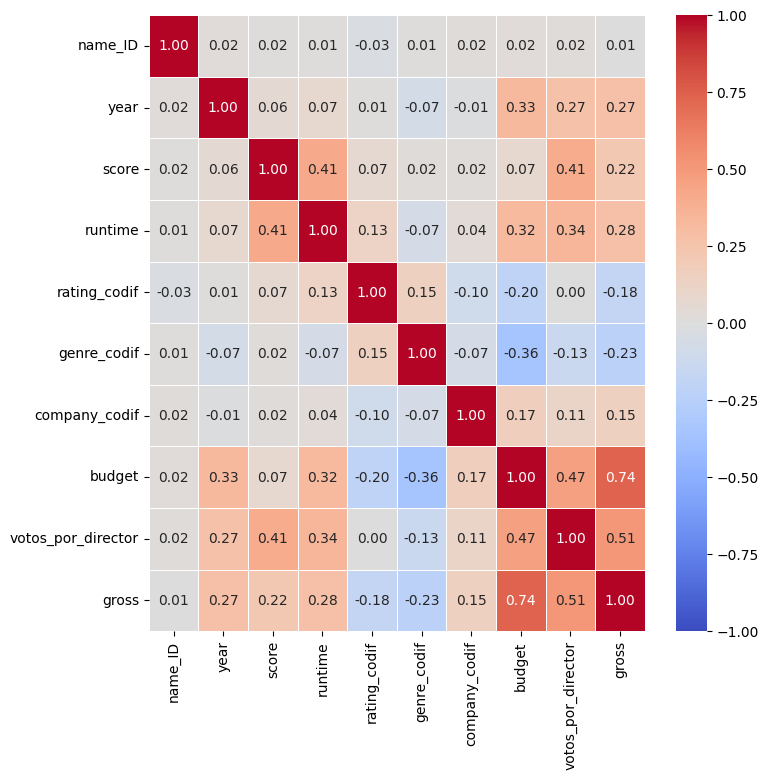

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(df3.corr(numeric_only=True),annot=True,vmin=-1, cmap='coolwarm', fmt=".2f", linewidths=.5);

Modelado

In [131]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5435 entries, 0 to 7652
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name_ID             5435 non-null   int32  
 1   year                5435 non-null   float64
 2   score               5435 non-null   float64
 3   runtime             5435 non-null   float64
 4   rating_codif        5435 non-null   int32  
 5   genre_codif         5435 non-null   int32  
 6   company_codif       5435 non-null   int32  
 7   budget              5435 non-null   float64
 8   votos_por_director  5435 non-null   float64
 9   gross               5435 non-null   float64
dtypes: float64(6), int32(4)
memory usage: 382.1 KB


In [187]:
df3['gross'].describe()

count    5.435000e+03
mean     1.030164e+08
std      1.871203e+08
min      3.090000e+02
25%      1.067204e+07
50%      3.669007e+07
75%      1.119673e+08
max      2.847246e+09
Name: gross, dtype: float64

In [180]:
X = df3.drop(['gross', 'name_ID', 'company_codif'], axis=1)
# X = df3[['votos_por_director','budget']]
y = df3['gross']

In [181]:
X

,year,score,runtime,rating_codif,genre_codif,budget,votos_por_director
0,1980.0,8.4,146.0,6,6,19000000.0,643666.67
1,1980.0,5.8,104.0,6,1,4500000.0,23394.88
2,1980.0,8.7,124.0,4,0,18000000.0,448666.67
3,1980.0,7.7,88.0,4,4,3500000.0,66375.00
4,1980.0,7.3,98.0,6,4,6000000.0,139766.67
...,...,...,...,...,...,...,...
7648,2020.0,6.6,124.0,6,0,90000000.0,140000.00
7649,2020.0,6.5,99.0,4,0,85000000.0,102000.00
7650,2020.0,5.6,101.0,4,1,175000000.0,62350.00
7651,2020.0,6.8,100.0,4,1,135000000.0,42000.00


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4348, 2)
(1087, 2)
(4348,)
(1087,)


PipeLine Regresión Lineal

In [135]:
pipeline_lnr = Pipeline([
    ('scaler', StandardScaler()),  
    ('regression', LinearRegression())
    ])

In [136]:
parametros_grid = {'regression__fit_intercept': [True, False]}

In [137]:
grid_search = GridSearchCV(pipeline_lnr, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)

In [138]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regression', LinearRegression())]),
             n_jobs=-1, param_grid={'regression__fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error', verbose=1)

In [139]:
mejores_parametros_lnr = grid_search.best_params_

In [140]:
y_pred = grid_search.predict(X_test)

In [141]:
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [160]:
print(f"Mejores hiperparámetros: {mejores_parametros_lnr}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")

Mejores hiperparámetros: {'regression__fit_intercept': True}
MAE: 61184244.36
MAPE: 46.89 %


Mejores hiperparámetros: {'regression__fit_intercept': True}

Esto te indica que, según la búsqueda de hiperparámetros, el mejor valor para el hiperparámetro fit_intercept de tu modelo de regresión lineal fue True.
MAE: 67801748.76227577

El error absoluto medio (MAE) es una métrica que mide el promedio de las diferencias absolutas entre las predicciones y los valores reales. En este caso, un valor de MAE de 67801748.76 significa que, en promedio, las predicciones de tu modelo difieren en alrededor de 67,801,748.76 unidades del valor real.
MAPE: 50.60132354176165

El error porcentual absoluto medio (MAPE) es una métrica que mide el promedio de los errores porcentuales absolutos entre las predicciones y los valores reales. Un valor de MAPE del 50.60% indica que, en promedio, las predicciones tienen un error del 50.60% en comparación con los valores reales.
MSE: 1.4230961428195888e+16

El error cuadrático medio (MSE) es una métrica que mide el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. El valor de MSE en notación científica (1.42e+16) indica que el cuadrado medio de las diferencias es bastante grande.

PipeLine Regresión Polinomial

In [143]:
from sklearn.preprocessing import PolynomialFeatures

In [161]:
pipeline_polyr = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('regression', LinearRegression()) 
])

parametros_grid = {
    'poly__degree': [2, 3, 4, 5], 
    'regression__fit_intercept': [True, False]
}

grid_search = GridSearchCV(pipeline_polyr, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_polyr = grid_search.best_params_
y_pred = grid_search.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_polyr}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Mejores hiperparámetros: {'poly__degree': 5, 'regression__fit_intercept': False}
MAE: 60519092.72
MAPE: 49.89 %


Ridge

In [145]:
from sklearn.linear_model import Ridge

In [162]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge()) 
])

parametros_grid = {
    'poly__degree': [2, 3, 4, 5], 
    'ridge__alpha': [0.1, 1.0, 10.0], 
}

grid_search = GridSearchCV(pipeline_ridge, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_ridge = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_ridge}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'poly__degree': 5, 'ridge__alpha': 10.0}
MAE: 60571029.87
MAPE: 50.02 %


Lasso

In [147]:
from sklearn.linear_model import Lasso

In [163]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),  
    ('poly', PolynomialFeatures()),  
    ('lasso', Lasso())  
])

parametros_grid = {
    'poly__degree': [2, 3, 4, 5],  
    'lasso__alpha': [0.1, 1.0, 10.0], 
}

grid_search = GridSearchCV(pipeline_lasso, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_lasso = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_lasso}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros: {'lasso__alpha': 0.1, 'poly__degree': 4}
MAE: 60470102.54
MAPE: 47.57 %


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.739e+19, tolerance: 1.536e+16
  model = cd_fast.enet_coordinate_descent(


Elastic Net

In [149]:
from sklearn.linear_model import ElasticNet

In [164]:
pipeline_en = Pipeline([
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures()), 
    ('elastic_net', ElasticNet())
])

parametros_grid = {
    'poly__degree': [1, 2, 3], 
    'elastic_net__alpha': [0.1, 1.0, 10.0], 
    'elastic_net__l1_ratio': [0.1, 0.5, 0.9]
}

grid_search = GridSearchCV(pipeline_en, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_en = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mejores hiperparámetros: {mejores_parametros_en}")
print(f"MAE: {round(mae, 2)}")
print(f"MAPE: {round(mape, 2)} %")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros: {'elastic_net__alpha': 0.1, 'elastic_net__l1_ratio': 0.9, 'poly__degree': 2}
MAE: 61184244.36
MAPE: 46.89 %


Random Forest Regressor

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [166]:
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print(f"MAE: {round(mae_rf, 2)}")
print(f"R2: {round(r2_rf, 2)}")


Random Forest Regressor:
MAE: 66575436.53
MSE: 1.6629723066916108e+16
R2: 0.51


Gradient Boosting

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

In [167]:
modelo_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor:")
print(f"MAE: {round(mae_gb, 2)}")
print(f"R2: {round(r2_gb, 2)}")

Gradient Boosting Regressor:
MAE: 62234160.62
MSE: 1.4911167725573736e+16
R2: 0.56


In [182]:
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),  
    ('poly', PolynomialFeatures()),  
    ('regressor', ElasticNet())
])

parametros_grid = {
    'scaler' : [StandardScaler(), None],
    'poly__degree': [2, 3, 4, 5],  
    'regressor__alpha': np.logspace(-3, 3, 7), 
    'regressor__l1_ratio': [0.1, 0.5, 0.9] 
}


grid_search = GridSearchCV(pipeline_reg, parametros_grid, scoring='neg_mean_absolute_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
mejores_parametros_reg = grid_search.best_params_
y_pred = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"Mejores hiperparámetros: {mejores_parametros_reg}")
print(f"MAE: {round(mae, 2)}")
print(f"MSE: {round(mse, 2)}")


Fitting 5 folds for each of 168 candidates, totalling 840 fits
Mejores hiperparámetros: {'poly__degree': 4, 'regressor__alpha': 0.001, 'regressor__l1_ratio': 0.9, 'scaler': None}
MAE: 60536104.09
MSE: 1.394932960511159e+16


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.749e+19, tolerance: 1.536e+16
  model = cd_fast.enet_coordinate_descent(


In [188]:
data = {'y_pred': y_pred, 'y_test': y_test, 'diferencia': y_pred - y_test}
comprobacion = pd.DataFrame(data)

In [191]:
comprobacion

,y_pred,y_test,diferencia
4780,4.198898e+07,1123136.0,4.086584e+07
7294,1.370872e+08,31882724.0,1.052045e+08
3492,5.499903e+07,42593455.0,1.240558e+07
5764,1.620014e+08,134748021.0,2.725340e+07
1612,2.102996e+07,3560932.0,1.746902e+07
...,...,...,...
1403,8.715737e+06,40397.0,8.675340e+06
3220,7.389304e+07,19745922.0,5.414711e+07
1889,2.792393e+07,31347154.0,-3.423228e+06
2794,5.751446e+06,10426506.0,-4.675060e+06


In [196]:
comprobacion.sort_values(by='diferencia', ascending=False)

,y_pred,y_test,diferencia
6079,1.248546e+09,2.841391e+08,9.644072e+08
4870,1.168874e+09,3.910812e+08,7.777925e+08
6378,7.703718e+08,1.976876e+08,5.726842e+08
6692,7.253669e+08,2.090357e+08,5.163312e+08
7261,8.453288e+08,3.929248e+08,4.524040e+08
...,...,...,...
209,8.569012e+07,7.929106e+08,-7.072204e+08
7051,2.260968e+08,9.625429e+08,-7.364461e+08
6262,5.133870e+08,1.281508e+09,-7.681211e+08
7450,2.512589e+08,1.074427e+09,-8.231685e+08


In [197]:
# idea de mostrar una grafica con que peliculas por categorias de facturación son las que mejor predice en funcion a los presupuestos?

In [ ]:
import pickle

In [ ]:
with open('my_model.pkl', "wb") as archivo_salida:
    pickle.dump(final_model, archivo_salida)

In [ ]:
with open('my_model.pkl', 'rb') as archivo_entrada:
    model_pretrained = pickle.load(archivo_entrada)